Load the dataset and inspect the first few rows

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving hr_dashboard_data_tabular.csv to hr_dashboard_data_tabular.csv


In [ ]:
import pandas as pd
data = pd.read_csv('hr_dashboard_data_tabular.csv')
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


Check for missing values:

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Get summary statistics for numerical columns
summary_statistics = data.describe()

missing_values, summary_statistics


(Name                     0
 Age                      0
 Gender                   0
 Projects Completed       0
 Productivity (%)         0
 Satisfaction Rate (%)    0
 Feedback Score           0
 Department               0
 Position                 0
 Joining Date             0
 Salary                   0
 dtype: int64,
               Age  Projects Completed  Productivity (%)  \
 count  200.000000          200.000000        200.000000   
 mean    34.650000           11.455000         46.755000   
 std      9.797318            6.408849         28.530068   
 min     22.000000            0.000000          0.000000   
 25%     26.000000            6.000000         23.000000   
 50%     32.000000           11.000000         45.000000   
 75%     41.000000           17.000000         70.000000   
 max     60.000000           25.000000         98.000000   
 
        Satisfaction Rate (%)  Feedback Score         Salary  
 count             200.000000      200.000000     200.000000  
 mean    

Visualize the distributions of numerical features:

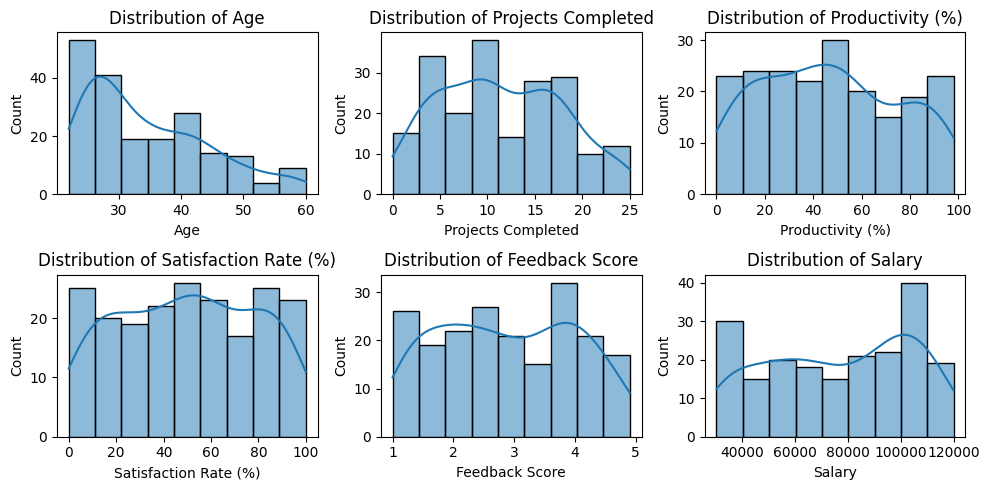

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Numerical features for visualization
numerical_features = ['Age', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary']

# Plot distributions of numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


Visualize the counts of categorical features:

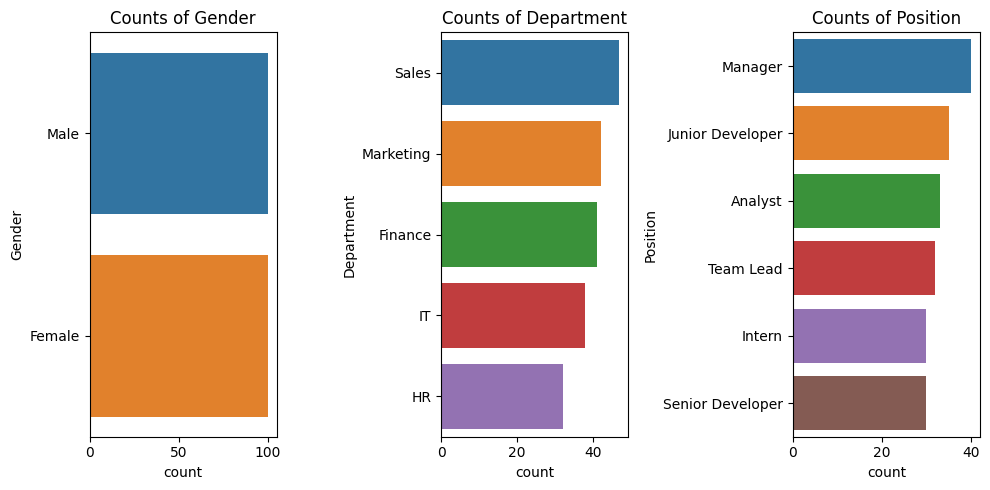

In [ ]:
# Categorical features for visualization
categorical_features = ['Gender', 'Department', 'Position']

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Plot counts of categorical features
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=data[feature], order=data[feature].value_counts().index)
    plt.title(f'Counts of {feature}')
    plt.tight_layout()

plt.show()


Data Preprocessing:

In [ ]:
current_year = 2023
data['Years of Service'] = data.apply(lambda row: current_year - (2000 + int(row['Joining Date'].split('-')[1]))
                                                       if int(row['Joining Date'].split('-')[1]) < 22
                                                       else current_year - (1900 + int(row['Joining Date'].split('-')[1])),
                                                       axis=1)

# Drop the original 'Joining Date' column from the original dataset
data.drop('Joining Date', axis=1, inplace=True)

# Update the modified dataset with the corrected 'Years of Service' column
data['Years of Service'] = data['Years of Service']

# Display the updated dataset with corrected 'Years of Service' column
data.head()



,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Years of Service
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,63596,3
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,112540,24
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,66292,6
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,38303,101
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,101133,18


The "Years of Service" has been corrected, but there's another anomaly: a value of 101 years of service. This indicates another issue with the "Joining Date" column where the year was likely misentered as "Jan-22" for the employee "Joshua Lewis".

Given that it's the year 2023 in this context, it's impossible for the employee to have joined 101 years ago. We might need to address this anomaly during the data cleaning process.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features for one-hot encoding and scaling
features_to_encode = ['Gender', 'Department', 'Position']
features_to_scale = ['Age', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary', 'Years of Service']

# Create transformers
transformers = [
    ('onehot', OneHotEncoder(drop='first'), features_to_encode),
    ('scale', StandardScaler(), features_to_scale)
]

# Create and fit the column transformer
preprocessor = ColumnTransformer(transformers)
data_preprocessed = preprocessor.fit_transform(data.drop(columns=['Name']))

# Convert the preprocessed data back to a DataFrame for better visualization
columns_transformed = (preprocessor.named_transformers_['onehot'].get_feature_names_out(features_to_encode).tolist() +
                       features_to_scale)
data_transformed = pd.DataFrame(data_preprocessed, columns=columns_transformed)

data_transformed.head()


,Gender_Male,Department_HR,Department_IT,Department_Marketing,Department_Sales,Position_Intern,Position_Junior Developer,Position_Manager,Position_Senior Developer,Position_Team Lead,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary,Years of Service
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.987435,-0.071174,0.359996,-0.863941,1.621668,-0.482083,-0.528468
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.491611,1.180233,0.289719,0.903093,-0.074077,1.329684,0.398669
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.475811,-0.540451,1.414157,-1.383657,-0.431076,-0.382285,-0.396020
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.885110,-1.635432,0.219441,-1.591543,-1.323574,-1.418358,3.798173
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.854413,0.398104,-1.537494,-1.418305,1.443169,0.907429,0.133773


Clustering and Anomaly Detection:

Determining the optimal number of clusters using the Elbow Method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

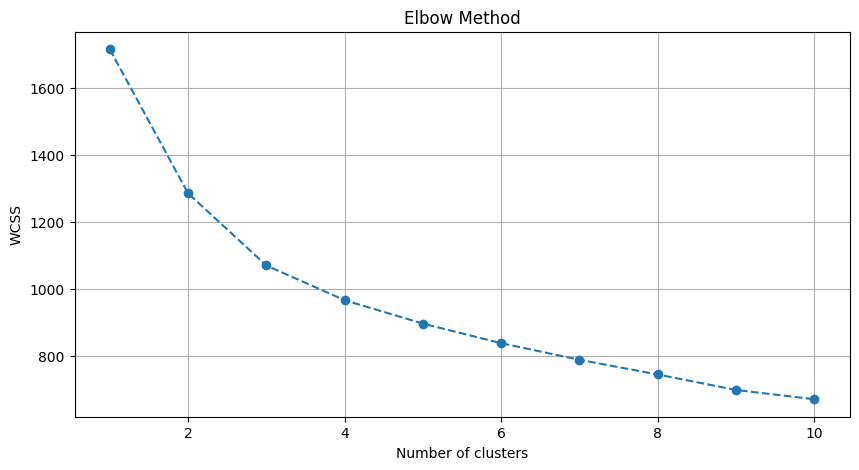

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
max_clusters = 10  # We'll test up to 10 clusters

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


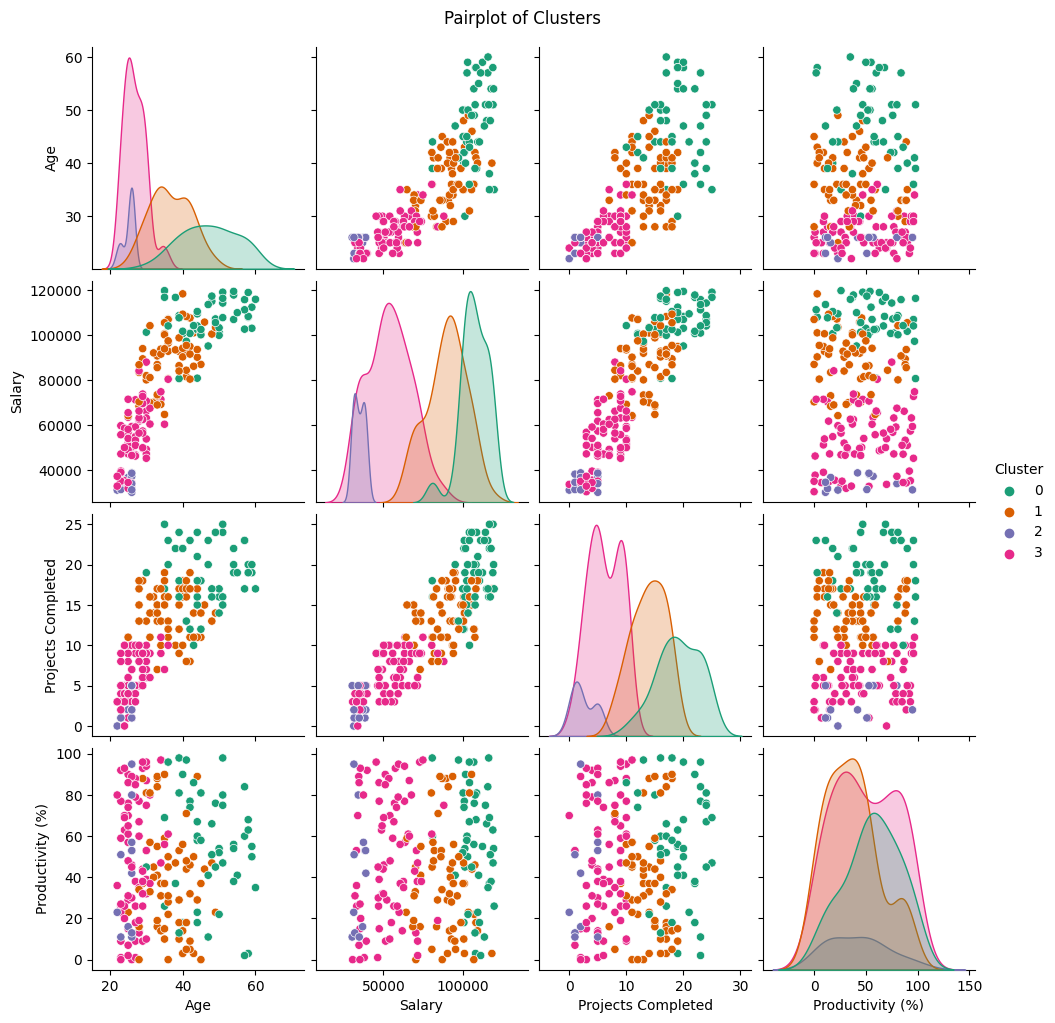

In [ ]:
# Fit the KMeans model with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_assignments = kmeans.fit_predict(data_transformed)

# Add cluster assignments to the original dataset
data['Cluster'] = cluster_assignments

# Visualize the cluster assignments using a pairplot
sns.pairplot(data=data, hue='Cluster', vars=['Age', 'Salary', 'Projects Completed', 'Productivity (%)'], palette='Dark2')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()


Anomaly detection:

In [ ]:
import numpy as np

# Calculate the distance of each data point from its cluster centroid
distances = np.linalg.norm(data_transformed - kmeans.cluster_centers_[cluster_assignments], axis=1)

# Set a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(distances, 95)

# Detect anomalies
anomalies = data[distances > threshold]

anomalies


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Years of Service,Cluster
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,38303,101,2
69,Dana Taylor,25,Female,2,16,95,4.0,Sales,Intern,36842,101,2
76,Allison Smith,22,Male,0,23,60,2.4,HR,Intern,31230,101,2
120,Michael Rodriguez,26,Female,5,11,67,3.6,HR,Intern,30231,101,2
122,Nicholas Johnson,26,Male,1,13,16,4.8,Marketing,Intern,31878,101,2
130,Michael Perez,26,Male,5,57,49,4.1,IT,Intern,37357,101,2
131,John Elliott,23,Female,1,51,93,2.5,Sales,Intern,31456,101,2
134,Denise Singleton,26,Female,5,53,56,3.9,HR,Intern,38714,101,2
146,Mrs. Heidi Villa,23,Male,1,11,7,1.6,Marketing,Intern,34697,101,2
194,Michael Baker,26,Female,2,95,54,3.4,IT,Intern,31328,101,2


Data Imputation, Feature Processing, and Selection:

In [ ]:
from sklearn.impute import SimpleImputer

# Define an imputation strategy
imputer = SimpleImputer(strategy='mean')

# Although there are no missing values, we'll fit the imputer for demonstration
imputer.fit(data_transformed)

# Check if any imputation is performed (for demonstration purposes)
data_imputed = imputer.transform(data_transformed)
pd.DataFrame(data_imputed, columns=data_transformed.columns).equals(data_transformed)


True

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use the cluster assignments as a target variable for demonstration purposes
y = data['Cluster']

# Train a Random Forest classifier to assess feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data_transformed, y)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': data_transformed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
15,Salary,0.192103
11,Projects Completed,0.189060
16,Years of Service,0.164682
10,Age,0.127762
13,Satisfaction Rate (%),0.077200
7,Position_Manager,0.072386
12,Productivity (%),0.044798
14,Feedback Score,0.033285
8,Position_Senior Developer,0.023217
6,Position_Junior Developer,0.021133


In [ ]:
# Determine the 25th percentile of the feature importance values
threshold = feature_importance_df['Importance'].quantile(0.25)

# Identify features to drop
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature'].tolist()

# Drop the identified features from the transformed dataset
data_transformed_dropped = data_transformed.drop(columns=features_to_drop)

data_transformed_dropped.head()


,Gender_Male,Position_Intern,Position_Junior Developer,Position_Manager,Position_Senior Developer,Position_Team Lead,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary,Years of Service
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.987435,-0.071174,0.359996,-0.863941,1.621668,-0.482083,-0.528468
1,0.0,0.0,0.0,1.0,0.0,0.0,2.491611,1.180233,0.289719,0.903093,-0.074077,1.329684,0.398669
2,1.0,0.0,0.0,0.0,0.0,0.0,-0.475811,-0.540451,1.414157,-1.383657,-0.431076,-0.382285,-0.396020
3,0.0,1.0,0.0,0.0,0.0,0.0,-0.885110,-1.635432,0.219441,-1.591543,-1.323574,-1.418358,3.798173
4,1.0,0.0,0.0,0.0,0.0,1.0,0.854413,0.398104,-1.537494,-1.418305,1.443169,0.907429,0.133773


Model Building with AutoML:

In [ ]:
pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=f8008e38a338a9598a9c6b1307007d8e4671b732b6d2a72fb7670d2505e5eb00
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
import h2o
h2o.init()

hf = h2o.H2OFrame(pd.DataFrame(data))
train, valid, test = hf.split_frame(ratios=[0.7, 0.15], seed=42)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 57 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_pkiwsw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.000 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.automl import H2OAutoML

y = "Years of Service"
x = train.columns
x.remove(y)

aml = H2OAutoML(max_models=20, max_runtime_secs=600, seed=42)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)


AutoML progress: |
05:11:12.853: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
05:11:13.245: _train param, Dropping bad and constant columns: [Name]

██
05:11:24.809: _train param, Dropping bad and constant columns: [Name]


05:11:26.149: _train param, Dropping bad and constant columns: [Name]
05:11:26.149: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 143.0.
05:11:26.152: _train param, Dropping bad and constant columns: [Name]

█
05:11:29.767: _train param, Dropping bad and constant columns: [Name]

█
05:11:34.156: _train param, Dropping bad and constant columns: [Name]

██
05:11:38.407: _train param, Dropping bad and constant columns: [Name]

█
05:11:41.59: _train param, Dropping bad and con

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))


model_id                                                    rmse       mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_51112   4.8898    23.9102   3.84714  nan                          23.9102
StackedEnsemble_AllModels_1_AutoML_1_20231018_51112      4.99472   24.9472   3.91874  nan                          24.9472
XGBoost_grid_1_AutoML_1_20231018_51112_model_4           5.52806   30.5595   4.29875    0.455479                   30.5595
XGBoost_grid_1_AutoML_1_20231018_51112_model_3           5.85522   34.2836   4.26173  nan                          34.2836
GBM_grid_1_AutoML_1_20231018_51112_model_2               7.30423   53.3518   5.5646   nan                          53.3518
GBM_4_AutoML_1_20231018_51112                            7.99743   63.9588   5.8762   nan                          63.9588
XGBoost_2_AutoML_1_20231018_51112                        8.03706   64.5944   5.82121  nan                          64.5944
GBM_3_AutoML_1_2

In [ ]:
preds = aml.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_AllModels_1_AutoML_1_20231018_51112,4.43868,19.7019,3.58254,0.659076,19.7019,1188,1.2153,StackedEnsemble,16.142
StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_51112,4.4849,20.1143,3.738,0.780022,20.1143,902,0.768788,StackedEnsemble,16.1224
DeepLearning_grid_2_AutoML_1_20231018_51112_model_1,4.71154,22.1986,3.21499,0.420214,22.1986,19688,0.022946,DeepLearning,6.94081
XGBoost_grid_1_AutoML_1_20231018_51112_model_4,4.72309,22.3076,3.91093,0.519648,22.3076,1626,0.136678,XGBoost,16.5495
XGBoost_grid_1_AutoML_1_20231018_51112_model_1,4.78121,22.86,3.58234,0.462327,22.86,737,0.276629,XGBoost,15.8476
DeepLearning_grid_3_AutoML_1_20231018_51112_model_1,4.84791,23.5022,3.60388,nan,23.5022,24299,0.18962,DeepLearning,19.2793
XGBoost_grid_1_AutoML_1_20231018_51112_model_2,4.96813,24.6824,4.00188,0.502456,24.6824,659,0.048951,XGBoost,13.0174
XGBoost_grid_1_AutoML_1_20231018_51112_model_3,5.18027,26.8352,4.06812,0.564118,26.8352,352,0.043238,XGBoost,14.5251
GBM_4_AutoML_1_20231018_51112,5.4537,29.7429,3.712,0.667234,29.7429,300,0.051582,GBM,13.8809
XGBoost_2_AutoML_1_20231018_51112,5.98314,35.798,4.46818,nan,35.798,892,0.041903,XGBoost,15.1356


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

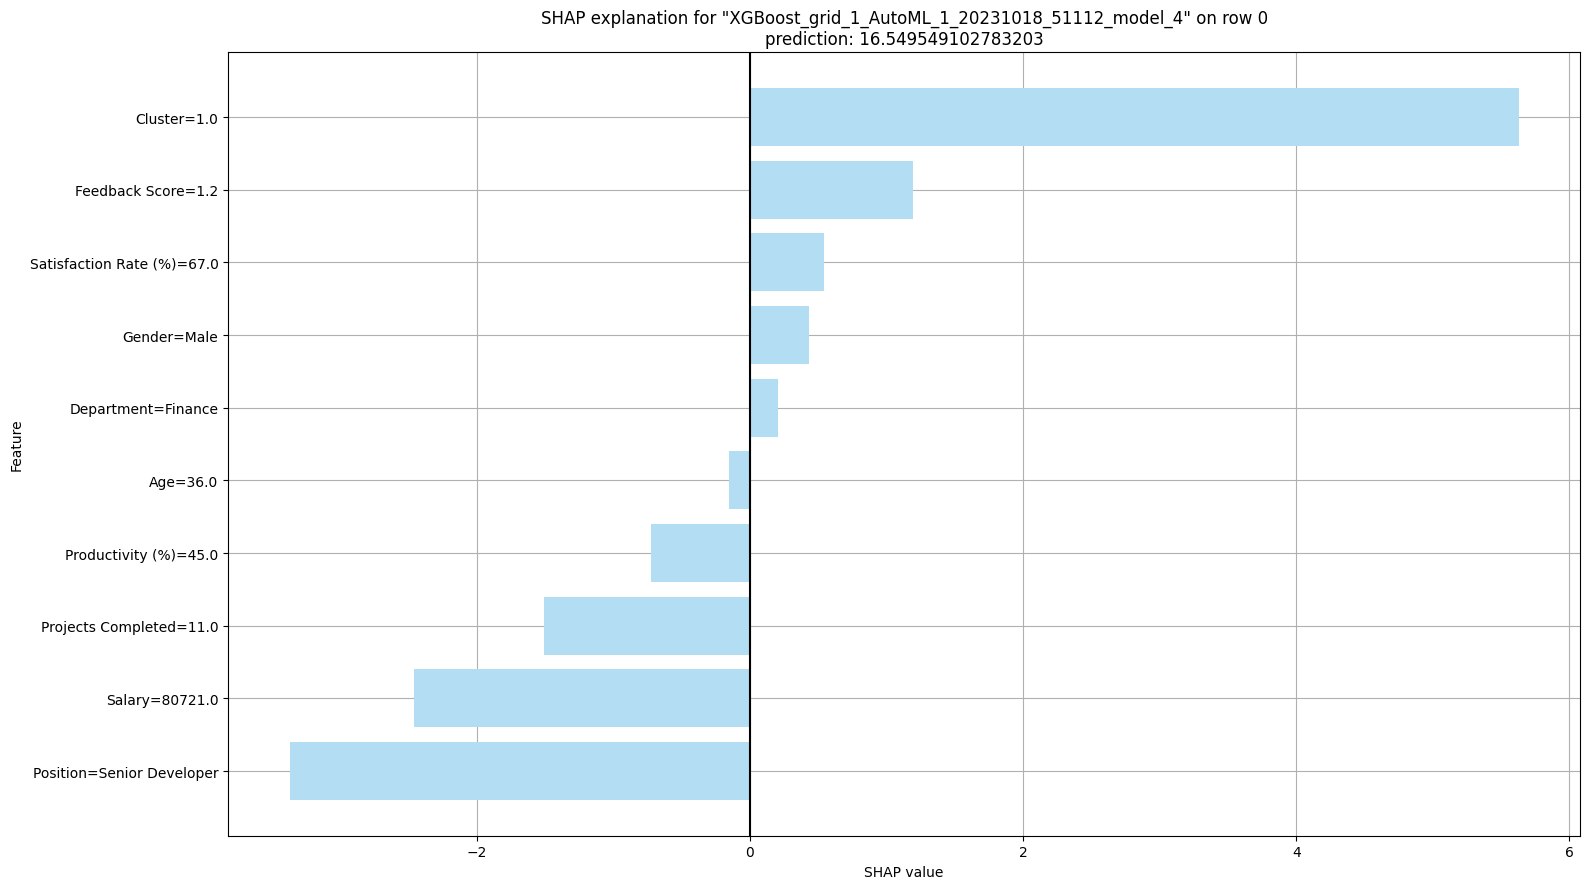

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_AllModels_1_AutoML_1_20231018_51112,4.43868,19.7019,3.58254,0.659076,19.7019,1188,1.2153,StackedEnsemble,16.142
StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_51112,4.4849,20.1143,3.738,0.780022,20.1143,902,0.768788,StackedEnsemble,16.1224
DeepLearning_grid_2_AutoML_1_20231018_51112_model_1,4.71154,22.1986,3.21499,0.420214,22.1986,19688,0.022946,DeepLearning,6.94081
XGBoost_grid_1_AutoML_1_20231018_51112_model_4,4.72309,22.3076,3.91093,0.519648,22.3076,1626,0.136678,XGBoost,16.5495
XGBoost_grid_1_AutoML_1_20231018_51112_model_1,4.78121,22.86,3.58234,0.462327,22.86,737,0.276629,XGBoost,15.8476
DeepLearning_grid_3_AutoML_1_20231018_51112_model_1,4.84791,23.5022,3.60388,nan,23.5022,24299,0.18962,DeepLearning,19.2793
XGBoost_grid_1_AutoML_1_20231018_51112_model_2,4.96813,24.6824,4.00188,0.502456,24.6824,659,0.048951,XGBoost,13.0174
XGBoost_grid_1_AutoML_1_20231018_51112_model_3,5.18027,26.8352,4.06812,0.564118,26.8352,352,0.043238,XGBoost,14.5251
GBM_4_AutoML_1_20231018_51112,5.4537,29.7429,3.712,0.667234,29.7429,300,0.051582,GBM,13.8809
XGBoost_2_AutoML_1_20231018_51112,5.98314,35.798,4.46818,nan,35.798,892,0.041903,XGBoost,15.1356


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

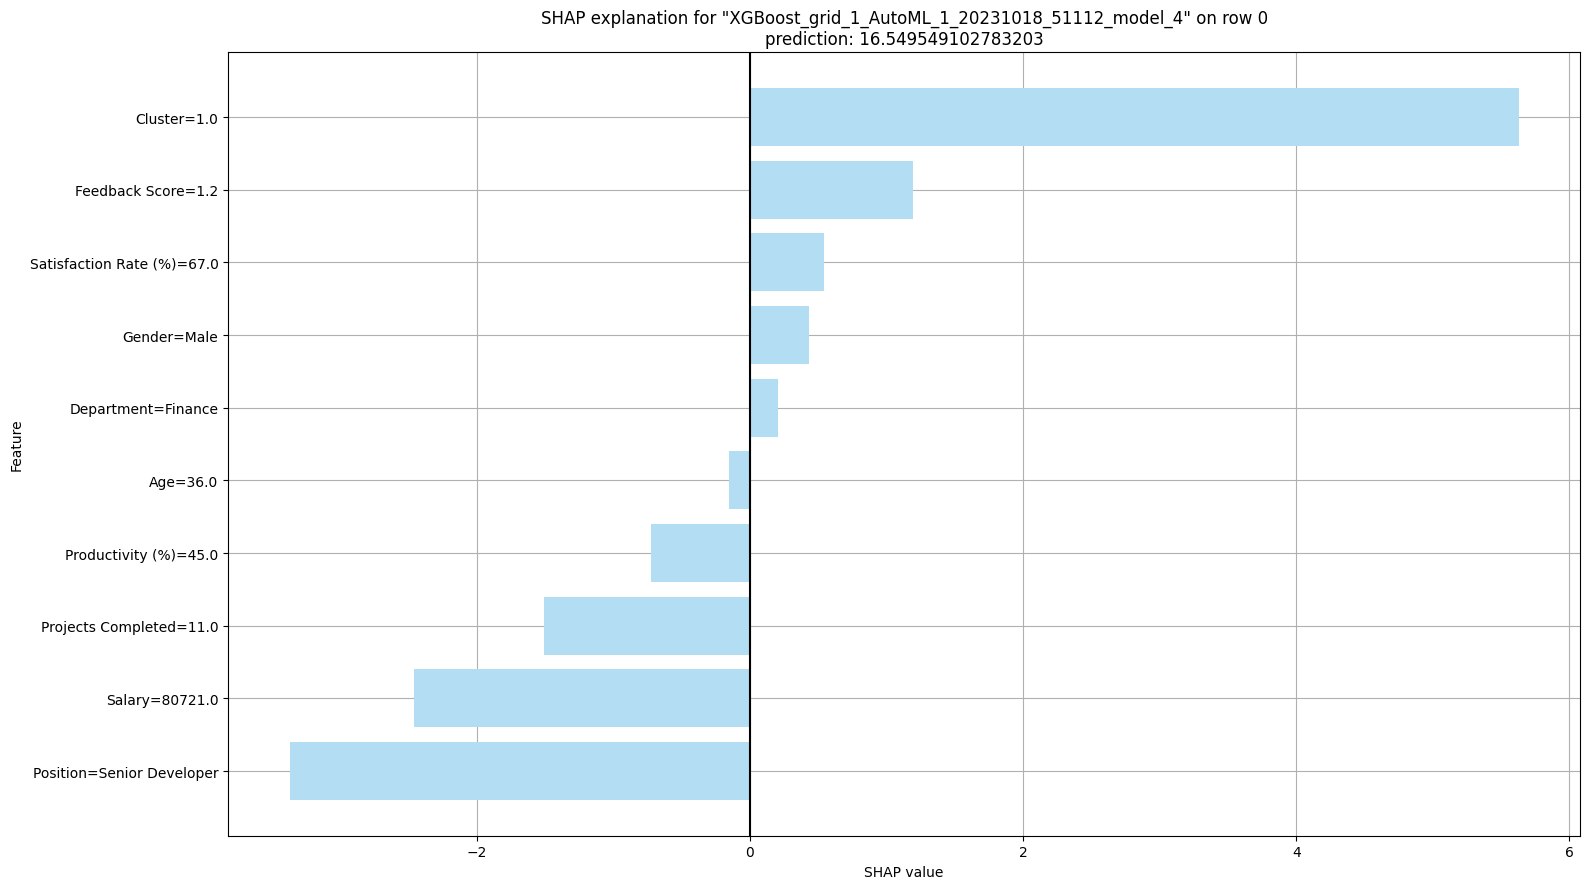

In [ ]:
aml.explain_row(test, row_index=0)